In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn')

In [2]:
## Cargamos archivos especificando columna string como suscriptor, 
## ya que aparte de numeros hay ruts, por lo que pandas no puede asumir el tipo

In [3]:
feb = pd.read_csv('febrero2017.csv', sep=';', dtype={'Suscriptor': str})
mar = pd.read_csv('marzo2017.csv', sep=';', dtype={'Suscriptor': str})
abr = pd.read_csv('abril2017.csv', sep=';', dtype={'Suscriptor': str})
may = pd.read_csv('mayo2017.csv', sep=';', dtype={'Suscriptor': str , 'Cod Tbk' : str , 'Cod OneClick' : str})
jun = pd.read_csv('junio2017.csv', sep=';', dtype={'Suscriptor': str})
jul = pd.read_csv('julio2017.csv', sep=';', dtype={'Suscriptor': str, 'Cod Tbk' : str , 'Cod OneClick' : str})


In [4]:
## Revisaremos el total de filas y columnas de cada archivo 
##para asegurarnos que al unirlos no se pierda ningun dato

In [5]:
print(feb.shape)
print(mar.shape)
print(abr.shape)
print(may.shape)
print(jun.shape)
print(jul.shape)

(222795, 13)
(304246, 13)
(304971, 13)
(330099, 13)
(332877, 13)
(354646, 13)


In [6]:
222795 + 304246 + 304971 + 330099 + 332877 + 354646

1849634

In [7]:
trx = feb.append([mar, abr, may, jun, jul])
trx.shape

(1849634, 15)

In [8]:
## Vemos que todos los dataframes tienen 13 columnas 
##y que la suma de la union es igual a la suma individual de filas, perfecto :)

In [9]:
## Ahora eliminaremos columnas que no son utiles para el análisis, 
## cambiaremos algunos nombres de columnas para mayor facilidad de trabajo
## y formatearemos la fecha que está como str

In [10]:
trx.head()

,Cod Autorizador,Cod Autorizador.1,Cod OneClick,Cod Tbk,E-mail,Estado,Fecha y Hora,Medio de Pago,Monto,Operador,Producto,Status,Suscriptor,mail,tipo
0,0,0,NaN,NaN,NaN,MEDIOSELECCIONADO,2017-02-02 16:14:16.881586,WebPay,750.0,Entel,Movil,sin mail,972712582,NaN,NaN
1,0,0,NaN,NaN,NaN,MEDIOSELECCIONADO,2017-02-02 16:50:49.877554,WebPay,750.0,Entel,Movil,sin mail,972712582,NaN,NaN
2,0,0,NaN,'20170202181914003,NaN,PAGOAPROBADO,2017-02-02 18:19:14.218119,WebPay,500.0,Entel,Movil,sin mail,972712582,NaN,NaN
3,0,0,NaN,'20170202184356004,NaN,PAGOAPROBADO,2017-02-02 18:43:56.693197,WebPay,500.0,Entel,Movil,sin mail,972712582,NaN,NaN
4,0,0,NaN,'20170202184710005,NaN,PAGOAPROBADO,2017-02-02 18:47:10.383714,WebPay,500.0,Entel,Movil,sin mail,942177735,NaN,NaN


In [11]:
del trx['Cod Autorizador']

In [12]:
del trx['Cod Autorizador.1']

In [13]:
del trx['Cod OneClick']

In [14]:
del trx['Cod Tbk']

In [15]:
del trx['mail']

In [16]:
del trx['tipo']

In [17]:
del trx['Status']

In [18]:
trx = trx.rename(columns={'Fecha y Hora':'Fecha','E-mail':'email', 
                          'Estado':'estado', 'Medio de Pago':'pago',
                         'Monto':'monto', 'Operador':'operador' ,
                         'Producto':'producto', 'Suscriptor':'suscriptor'})

In [19]:
fecha = trx['Fecha'].str[:10]
fecha = pd.DataFrame(fecha)
trx = trx.assign(fecha=fecha.values)
del trx['Fecha']

In [20]:
trx.head()

,email,estado,pago,monto,operador,producto,suscriptor,fecha
0,NaN,MEDIOSELECCIONADO,WebPay,750.0,Entel,Movil,972712582,2017-02-02
1,NaN,MEDIOSELECCIONADO,WebPay,750.0,Entel,Movil,972712582,2017-02-02
2,NaN,PAGOAPROBADO,WebPay,500.0,Entel,Movil,972712582,2017-02-02
3,NaN,PAGOAPROBADO,WebPay,500.0,Entel,Movil,972712582,2017-02-02
4,NaN,PAGOAPROBADO,WebPay,500.0,Entel,Movil,942177735,2017-02-02


In [21]:
trx.fecha = pd.to_datetime(trx['fecha'], format='%Y-%m-%d')

In [22]:
## Ahora reemplazaremos los NaN de los emails y pasaremos los montos a INT en vez de float 
## ya que son montos enteros

In [23]:
trx.email = trx.email.fillna('')

In [24]:
trx.monto.astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [25]:
## Al parecer hay algun monto NaN, lo que es imposible ya que la transacción
## no se crea con montos < 1

In [26]:
raros = trx[trx.monto.isnull()]

In [27]:
raros

,email,estado,pago,monto,operador,producto,suscriptor,fecha
332876,,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [28]:
## Encontramos 1 fila que no tiene ningun valor, por lo que la eliminaremos

In [29]:
trx.drop(332876, inplace=True)

In [30]:
trx.monto.astype(int)

0           750
1           750
2           500
3           500
4           500
5           500
6           100
7           100
8           500
9           750
10          500
11          100
12          100
13          100
14        10000
15         5000
16         2000
17         1000
18         1000
19         3000
20         5000
21         2000
22         4000
23         1000
24         1000
25        10000
26         3000
27         3000
28         4000
29         5000
          ...  
354616     4000
354617     5000
354618     1000
354619     1000
354620     1000
354621     2500
354622     2000
354623     1000
354624     1000
354625     1000
354626     1000
354627     1000
354628     1000
354629     1000
354630     1000
354631     1000
354632     1000
354633    16000
354634     3000
354635     1000
354636     1000
354637     1000
354638     1000
354639     1000
354640     1000
354641     1000
354642    10000
354643     3175
354644     3000
354645     1000
Name: monto, Length: 184

In [31]:
## Por último , setearemos el index para que sea la fecha

In [32]:
trx = trx.set_index('fecha')

In [33]:
## Crearemos un dataframe aparte con solo las transacciones finalizadas 

In [34]:
ventas = trx[trx.estado == 'FINALIZADO']

In [35]:
## Ahora si tenemos los datos listos para empezar a trabajar

   Análisis exploratorio de los datos

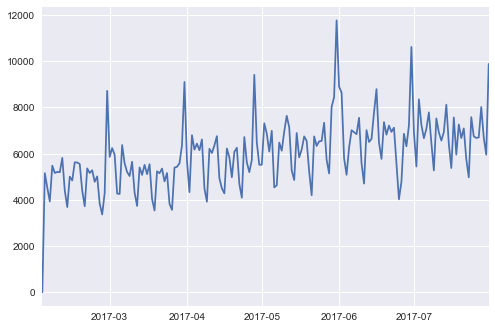

In [36]:
ventas.monto.groupby([ventas.index.date]).count().plot(kind="line")

In [37]:
### Al parecer hay un dia con muy pocos datos, probablemente es el día de pruebas 
### antes de pasar a producción

In [38]:
ventas.groupby(ventas.index.date).count()

,email,estado,pago,monto,operador,producto,suscriptor
2017-02-02,5,5,5,5,5,5,5
2017-02-03,5158,5158,5158,5158,5158,5158,5158
2017-02-04,4525,4525,4525,4525,4525,4525,4525
2017-02-05,3933,3933,3933,3933,3933,3933,3933
2017-02-06,5482,5482,5482,5482,5482,5482,5482
2017-02-07,5165,5165,5165,5165,5165,5165,5165
2017-02-08,5211,5211,5211,5211,5211,5211,5211
2017-02-09,5196,5196,5196,5196,5196,5196,5196
2017-02-10,5819,5819,5819,5819,5819,5819,5819
2017-02-11,4410,4410,4410,4410,4410,4410,4410


In [39]:
### El dia 02-02-2017 tiene muy pocos datos por lo que lo eliminaremos
### por suerte son los primeros 5 datos por lo que un drop simple lo soluciona

In [40]:
ventas = ventas.drop(ventas.index[0:5])

In [41]:
# Examinaremos el numero de transacciones por día y le agregaremos una columna con
# media móvil de 7 días.

In [42]:
trxdia = ventas.estado.groupby([ventas.index.date]).count().reset_index()
trxdia.columns = ['fecha', 'cantidad']
trxdia['MA'] = trxdia['cantidad'].rolling(7).mean()
trxdia.head(10)

,fecha,cantidad,MA
0,2017-02-03,5158,NaN
1,2017-02-04,4525,NaN
2,2017-02-05,3933,NaN
3,2017-02-06,5482,NaN
4,2017-02-07,5165,NaN
5,2017-02-08,5211,NaN
6,2017-02-09,5196,4952.857143
7,2017-02-10,5819,5047.285714
8,2017-02-11,4410,5030.857143
9,2017-02-12,3688,4995.857143


In [43]:
### Graficaremos estas dos variables para ver su comportamiento a través del tiempo

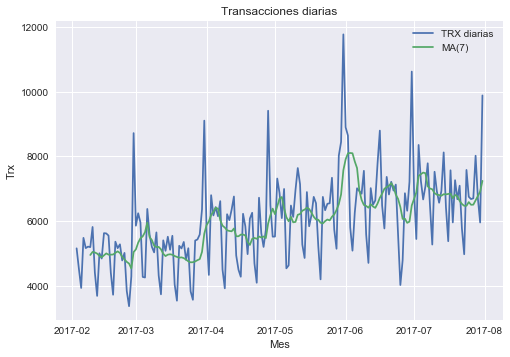

In [44]:
plt.figure()

x = trxdia['fecha']
y1 = trxdia['cantidad']
y2 = trxdia['MA']

plt.plot(x,y1, label= 'TRX diarias')
plt.plot(x,y2, label= 'MA(7)')
plt.title("Transacciones diarias")
plt.xlabel("Mes")
plt.ylabel("Trx")
plt.legend()

In [45]:
### Podemos observar que la serie tiene una tendencia creciente, con peaks marcados
### en los fines de mes y con caídas en los fines de semana

In [46]:
## Ahora visualizaremos la cantidad de transacciones por mes

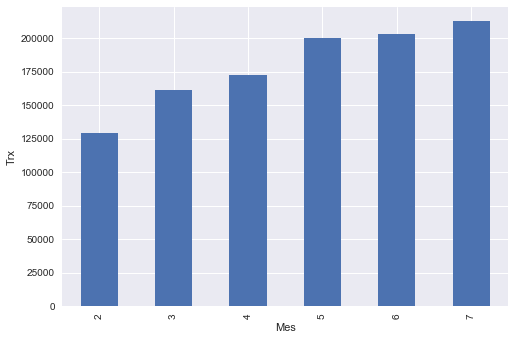

In [52]:
ventas.monto.groupby([ventas.index.month]).count().plot(kind="bar") 
plt.xlabel("Mes")
plt.ylabel("Trx")

In [48]:
## Nos interesa conocer la frecuencia de las recargas por cada suscriptor (número o rut)
## por lo que debemos crear esta variable contando las veces que aparece

In [49]:
freq = pd.DataFrame(ventas.suscriptor.value_counts().reset_index())
freq.columns = ['suscriptor', 'recargas']
freq.head(10)

,suscriptor,recargas
0,961510570,129
1,966078262,116
2,983868855,114
3,972011224,114
4,986974089,99
5,953397585,97
6,966399020,96
7,994519967,95
8,961334928,93
9,984052398,87


In [50]:
## Veremos la estadistica descriptiva de esta variable, con el fin de analizar como 
## trabajar con ella.

In [51]:
freq.describe(percentiles = [.1, .2 ,.3 ,.4, .5, .6, .7, .8 ,.9])

,recargas
count,452640.000000
mean,2.386232
std,3.034576
min,1.000000
10%,1.000000
20%,1.000000
30%,1.000000
40%,1.000000
50%,1.000000
60%,2.000000
